In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import pytz
mpl.rc("savefig", dpi=300)

In [63]:
df1 = pd.read_csv('./observation/East Lansing Hourly_crc.csv')
# df1 = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df1

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,wspd,srad,dew
0,2001.0,1.0,1.0,1.0,9.9,0.00,93.2,0.5,0.0,8.331010
1,2001.0,1.0,1.0,2.0,8.4,0.00,95.9,0.4,0.0,7.472482
2,2001.0,1.0,1.0,3.0,10.3,0.00,95.8,1.6,0.0,9.340836
3,2001.0,1.0,1.0,4.0,15.3,0.00,91.2,3.0,0.0,13.197472
4,2001.0,1.0,1.0,5.0,13.1,0.00,92.4,0.4,0.0,11.313050
...,...,...,...,...,...,...,...,...,...,...
157765,2018.0,12.0,31.0,14.0,35.2,0.09,97.5,3.4,2.4,34.564769
157766,2018.0,12.0,31.0,15.0,36.1,0.21,97.7,4.9,1.3,35.513687
157767,2018.0,12.0,31.0,16.0,37.0,0.12,98.0,6.5,1.0,36.488738
157768,2018.0,12.0,31.0,17.0,38.2,0.06,98.0,6.7,0.3,37.685915


In [64]:
df2 = pd.read_csv('./extracted/East_Lansing.csv')
df2

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd,dew
0,2001,1,1,1,8.497075,0.000018,85.807687,0.000000,4.532454,5.124327
1,2001,1,1,2,8.589634,0.000017,85.283309,0.000000,4.617539,5.081398
2,2001,1,1,3,6.564470,0.000017,86.271901,0.000000,4.740084,3.339818
3,2001,1,1,4,4.932643,0.000002,86.877533,0.000000,4.641265,1.883772
4,2001,1,1,5,3.351106,0.000005,87.266252,0.000000,4.535187,0.420887
...,...,...,...,...,...,...,...,...,...,...
157765,2018,12,31,14,36.390757,0.097944,93.771703,1.719981,6.890687,34.769478
157766,2018,12,31,15,37.016731,0.131063,94.434646,1.428776,7.335318,35.568403
157767,2018,12,31,16,37.475300,0.137758,94.937376,0.910994,6.099769,36.158149
157768,2018,12,31,17,37.506996,0.098595,95.926998,0.284990,5.440496,36.451979


In [16]:
obs_prcp_year = pd.unique(df1.groupby(df1.YEAR)['pcpn'].transform('sum'))
era_prcp_year = pd.unique(df2.groupby(df2.YEAR)['pcpn'].transform('sum'))

Text(0.5, 1.0, 'Annual Precipitation Comparison at East Lansing (hourly)')

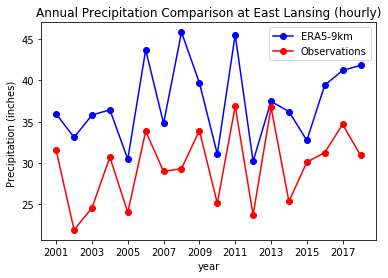

In [17]:
plt.plot(list(range(2001,2019)), era_prcp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_prcp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Annual Precipitation Comparison at East Lansing (hourly)')
# plt.savefig('./plot/ERA5-9km-prcp_hourly.png')

In [18]:
obs_prcp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['pcpn'].sum()).reshape(-1,3).sum(axis=1)
era_prcp_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['pcpn'].sum()).reshape(-1,3).sum(axis=1)

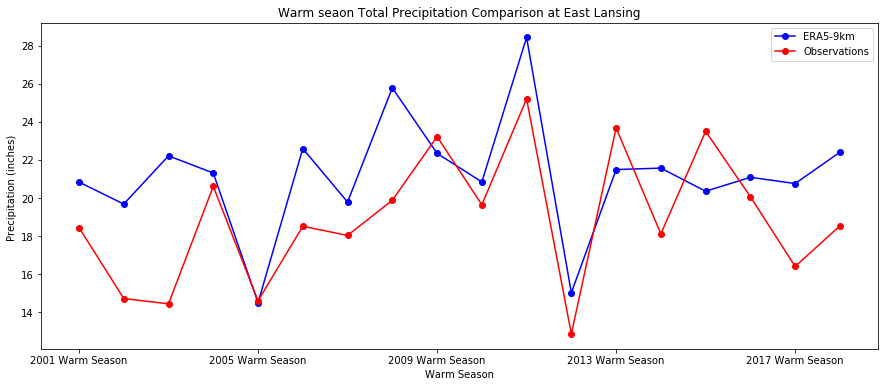

In [40]:
era_prcp_warm = []
i = 1
while i<len(era_prcp_season):
    era_prcp_warm.append(era_prcp_season[i])
    era_prcp_warm.append(era_prcp_season[i+1])
    i = i + 4
era_prcp_warm = np.array(era_prcp_warm)  
era_prcp_warm = era_prcp_warm.reshape((-1,2)).sum(axis=1)

obs_prcp_warm = []
i = 1
while i<len(obs_prcp_season):
    obs_prcp_warm.append(obs_prcp_season[i])
    obs_prcp_warm.append(obs_prcp_season[i+1])
    i = i + 4
obs_prcp_warm = np.array(obs_prcp_warm) 
obs_prcp_warm = obs_prcp_warm.reshape((-1,2)).sum(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,19)), era_prcp_warm, 'b-o')
plt.plot(list(range(1,19)), obs_prcp_warm, 'r-o')
plt.xticks(np.arange(1, 19, step=4),['{0} Warm Season'.format(4*i+2001) for i in range(18)])
plt.xlabel('Warm Season')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Warm seaon Total Precipitation Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-prcp_warmseason.png')

In [90]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/2/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
obs_prcp_days = np.where(np.array(df1.groupby([df1.YEAR,df1.MONTH,df1.DAY])['pcpn'].sum())>0.01,1,0)
dff1 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': obs_prcp_days})
dff1.astype(float)
obs_frq = dff1.groupby(dff1.YEAR)['events'].sum()
era_prcp_days = np.where(np.array(df2.groupby([df2.YEAR,df2.MONTH,df2.DAY])['pcpn'].sum())>0.01,1,0)
dff2 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': era_prcp_days})
dff2.astype(float)
era_frq = dff2.groupby(dff2.YEAR)['events'].sum()

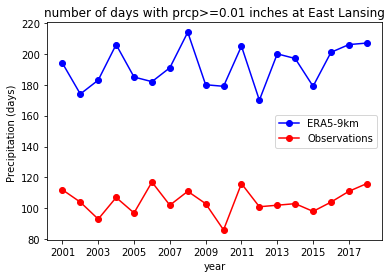

In [94]:
plt.plot(list(range(2001,2019)), era_frq, 'b-o')
plt.plot(list(range(2001,2019)), obs_frq, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (days) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('number of days with prcp>=0.01 inches at East Lansing')
plt.savefig('./plot/ERA5-9km-prcp_events.png')

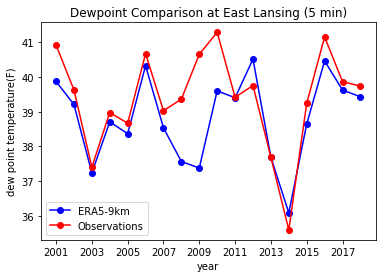

In [57]:
obs_dew_year = np.array(df1.groupby(df1.YEAR)['dew'].mean())
era_dew_year = np.array(df2.groupby(df2.YEAR)['dew'].mean())
plt.plot(list(range(2001,2019)), era_dew_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_dew_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('dew point temperature(F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Dewpoint Comparison at East Lansing (5 min)')
# plt.savefig('./plot/ERA5-9km-dew_hourly.png')
plt.savefig('./plot/ERA5-9km-dew_5min.png')

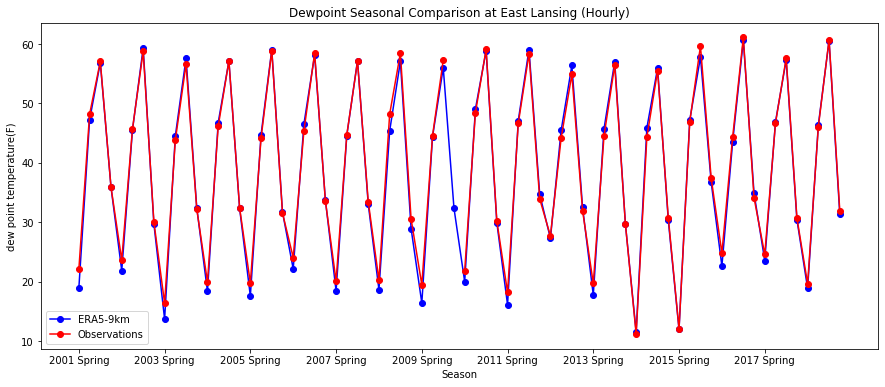

In [62]:
obs_dew_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['dew'].mean()).reshape(-1,3).mean(axis=1)
era_dew_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['dew'].mean()).reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_dew_season, 'b-o')
plt.plot(list(range(1,73)), obs_dew_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('dew point temperature(F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Dewpoint Seasonal Comparison at East Lansing (Hourly)')
plt.savefig('./plot/ERA5-9km-dew_season_hourly.png')

In [19]:
df1 = pd.read_csv('./observation/East Lansing Hourly_crc.csv')
# df1 = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df1

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,wspd,srad,dew
0,2001.0,1.0,1.0,1.0,9.9,0.00,93.2,0.5,0.0,8.331010
1,2001.0,1.0,1.0,2.0,8.4,0.00,95.9,0.4,0.0,7.472482
2,2001.0,1.0,1.0,3.0,10.3,0.00,95.8,1.6,0.0,9.340836
3,2001.0,1.0,1.0,4.0,15.3,0.00,91.2,3.0,0.0,13.197472
4,2001.0,1.0,1.0,5.0,13.1,0.00,92.4,0.4,0.0,11.313050
...,...,...,...,...,...,...,...,...,...,...
157765,2018.0,12.0,31.0,14.0,35.2,0.09,97.5,3.4,2.4,34.564769
157766,2018.0,12.0,31.0,15.0,36.1,0.21,97.7,4.9,1.3,35.513687
157767,2018.0,12.0,31.0,16.0,37.0,0.12,98.0,6.5,1.0,36.488738
157768,2018.0,12.0,31.0,17.0,38.2,0.06,98.0,6.7,0.3,37.685915


In [3]:
df2 = pd.read_csv('./extracted/East_lansing/East_Lansing_30km.csv')
df2

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd,dew
0,2001,1,1,1,10.185673,0.000019,84.288795,0.000000,4.870395,6.392396
1,2001,1,1,2,9.042820,0.000000,84.885489,0.000000,5.111853,5.424583
2,2001,1,1,3,7.669227,0.000000,84.871324,0.000000,5.153842,4.071150
3,2001,1,1,4,6.591853,0.000000,85.273245,0.000000,4.860731,3.114625
4,2001,1,1,5,8.296052,0.000000,87.021416,0.000000,4.306955,5.233476
...,...,...,...,...,...,...,...,...,...,...
157765,2018,12,31,14,36.849272,0.096381,91.463756,1.734608,9.233703,34.598256
157766,2018,12,31,15,37.480986,0.126756,93.241211,1.439388,9.799266,35.708561
157767,2018,12,31,16,37.468516,0.139184,95.454883,0.910134,8.496033,36.288859
157768,2018,12,31,17,38.050929,0.104641,95.023354,0.289101,7.773046,36.753306


In [4]:
obs_prcp_year = pd.unique(df1.groupby(df1.YEAR)['pcpn'].transform('sum'))
era_prcp_year = pd.unique(df2.groupby(df2.YEAR)['pcpn'].transform('sum'))

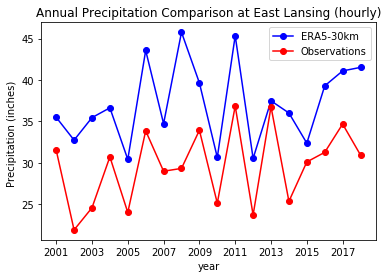

In [6]:
plt.plot(list(range(2001,2019)), era_prcp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_prcp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Annual Precipitation Comparison at East Lansing (hourly)')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-prcp_hourly.png')

In [12]:
obs_prcp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['pcpn'].sum()).reshape(-1,3).sum(axis=1)
era_prcp_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['pcpn'].sum()).reshape(-1,3).sum(axis=1)

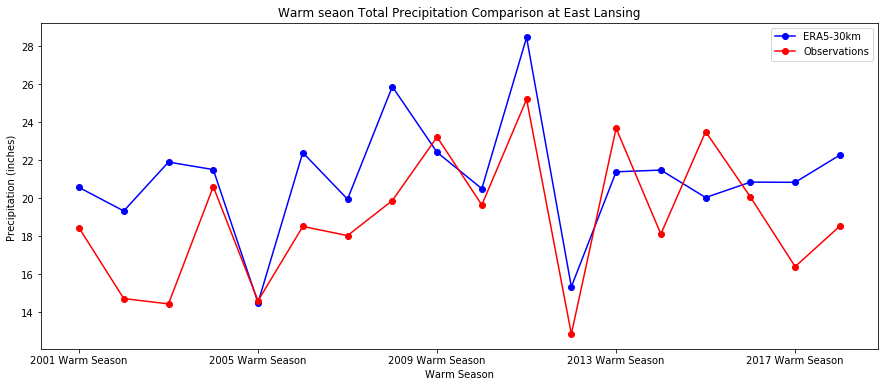

In [13]:
era_prcp_warm = []
i = 1
while i<len(era_prcp_season):
    era_prcp_warm.append(era_prcp_season[i])
    era_prcp_warm.append(era_prcp_season[i+1])
    i = i + 4
era_prcp_warm = np.array(era_prcp_warm)  
era_prcp_warm = era_prcp_warm.reshape((-1,2)).sum(axis=1)

obs_prcp_warm = []
i = 1
while i<len(obs_prcp_season):
    obs_prcp_warm.append(obs_prcp_season[i])
    obs_prcp_warm.append(obs_prcp_season[i+1])
    i = i + 4
obs_prcp_warm = np.array(obs_prcp_warm) 
obs_prcp_warm = obs_prcp_warm.reshape((-1,2)).sum(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,19)), era_prcp_warm, 'b-o')
plt.plot(list(range(1,19)), obs_prcp_warm, 'r-o')
plt.xticks(np.arange(1, 19, step=4),['{0} Warm Season'.format(4*i+2001) for i in range(18)])
plt.xlabel('Warm Season')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Warm seaon Total Precipitation Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-prcp_warmseason.png')

In [9]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/2/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
obs_prcp_days = np.where(np.array(df1.groupby([df1.YEAR,df1.MONTH,df1.DAY])['pcpn'].sum())>0.01,1,0)
dff1 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': obs_prcp_days})
dff1.astype(float)
obs_frq = dff1.groupby(dff1.YEAR)['events'].sum()
era_prcp_days = np.where(np.array(df2.groupby([df2.YEAR,df2.MONTH,df2.DAY])['pcpn'].sum())>0.01,1,0)
dff2 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': era_prcp_days})
dff2.astype(float)
era_frq = dff2.groupby(dff2.YEAR)['events'].sum()

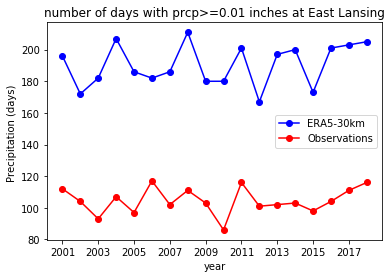

In [11]:
plt.plot(list(range(2001,2019)), era_frq, 'b-o')
plt.plot(list(range(2001,2019)), obs_frq, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (days) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('number of days with prcp>=0.01 inches at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-prcp_events.png')

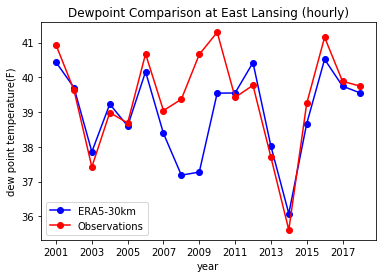

In [20]:
obs_dew_year = np.array(df1.groupby(df1.YEAR)['dew'].mean())
era_dew_year = np.array(df2.groupby(df2.YEAR)['dew'].mean())
plt.plot(list(range(2001,2019)), era_dew_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_dew_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('dew point temperature(F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Dewpoint Comparison at East Lansing (hourly)')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-dew_hourly.png')
# plt.savefig('./plot/East_lansing/30km/ERA5-30km-dew_5min.png')

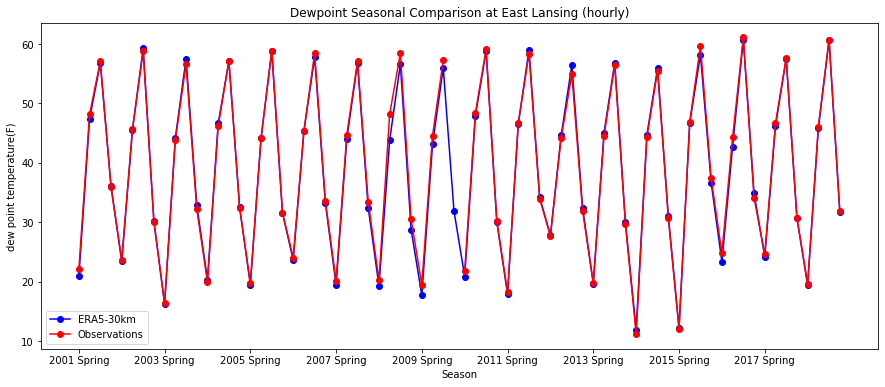

In [21]:
obs_dew_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['dew'].mean()).reshape(-1,3).mean(axis=1)
era_dew_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['dew'].mean()).reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_dew_season, 'b-o')
plt.plot(list(range(1,73)), obs_dew_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('dew point temperature(F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Dewpoint Seasonal Comparison at East Lansing (hourly)')
# plt.savefig('./plot/East_lansing/30km/ERA5-30km-dew_season_5min.png')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-dew_season_hourly.png')

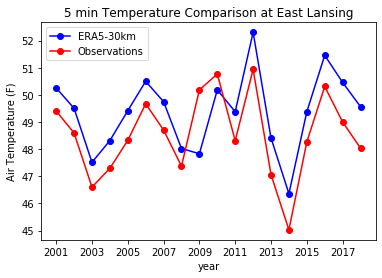

In [23]:
era_temp_year = pd.unique(df2.groupby(df2.YEAR)['atmp'].transform('mean'))
obs_temp_year = pd.unique(df1.groupby(df1.YEAR)['atmp'].transform('mean'))

plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Temperature Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-temp_5min.png')

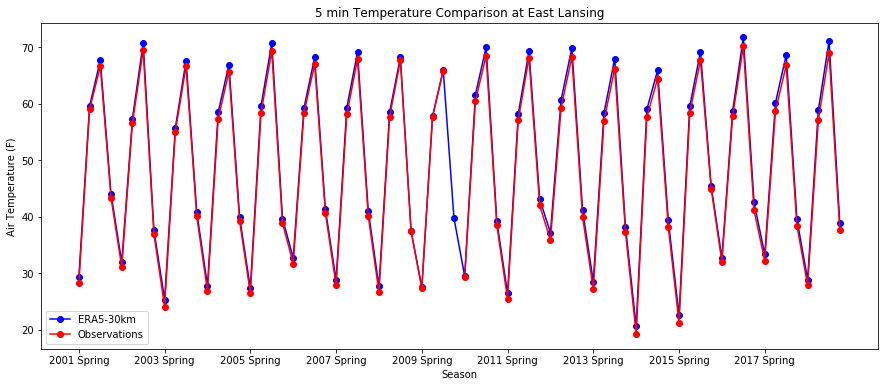

In [25]:
era_temp_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)
obs_temp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_temp_season, 'b-o')
plt.plot(list(range(1,73)), obs_temp_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Temperature Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-temp_season_5min.png')

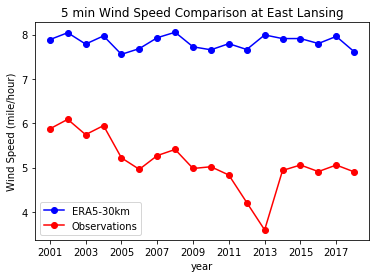

In [26]:
era_wind_year = pd.unique(df2.groupby(df2.YEAR)['wspd'].transform('mean'))
obs_wind_year = pd.unique(df1.groupby(df1.YEAR)['wspd'].transform('mean'))

plt.plot(list(range(2001,2019)), era_wind_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_wind_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Wind Speed Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-wind_5min.png')

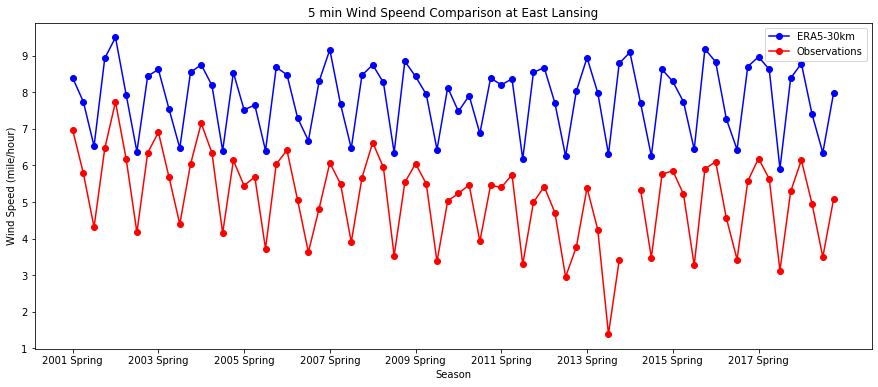

In [28]:
era_wind_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)
obs_wind_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_wind_season, 'b-o')
plt.plot(list(range(1,73)), obs_wind_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Wind Speend Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-wind_season_5min.png')

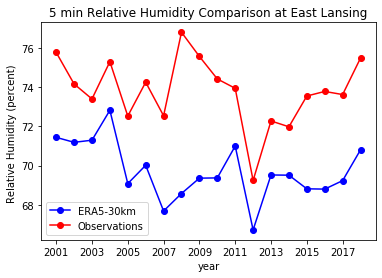

In [31]:
era_rh_year = pd.unique(df2.groupby(df2.YEAR)['relh'].transform('mean'))
obs_rh_year = pd.unique(df1.groupby(df1.YEAR)['relh'].transform('mean'))

plt.plot(list(range(2001,2019)), era_rh_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_rh_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Relative Humidity (percent) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-rh_5min.png')

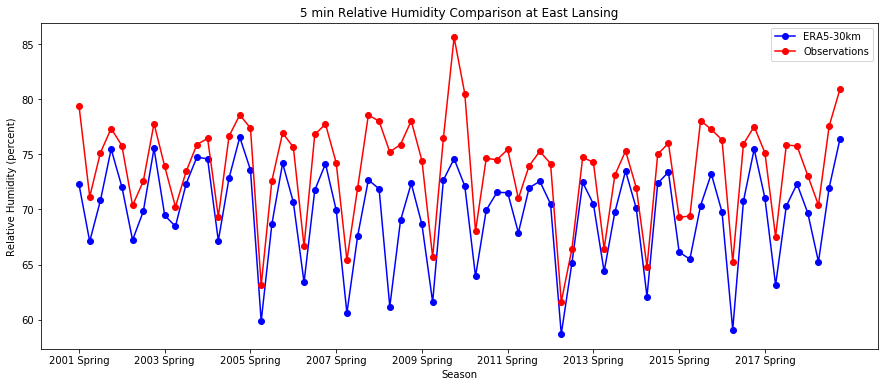

In [30]:
era_rh_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)
obs_rh_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_rh_season, 'b-o')
plt.plot(list(range(1,73)), obs_rh_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Relative Humidity (percent)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('5 min Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/East_lansing/30km/ERA5-30km-rh_season_5min.png')